#                                               Trend Analysis Exercise

## Description :

A currency pair is denoted as EUR-USD, where EUR, USD represents two different currencies. EUR is the base currency and USD is the counter currency. 

EUR -> Euro

USD -> US Dollar

JPY -> Japanese Yen



## Dataset :

EUR-USD = (4,2,4,5,3,2,5,6,7,8,7,8,9,8,7) 

EUR-JPY = (3,4,2,3,4,3,1,2,4,3,5,7,4,3,4) 

USD-JPY =  (6,4,1,7,8,7,9,10,7,4,1,3,6,5,9)


## Question :

Given the data points for three different currency pairs, analyze the trend of each currency.

1.	Determine which currency is the **best performing currency** among the three currencies EUR, USD, JPY?

2.	Determine which currency is the **worst performing currency** among the three currencies EUR, USD, JPY?

Please provide explanation, these are not answer based questions. Explain your thought process. You are welcome to provide pseudo code and working code as well. All graphs are made to the scale for your reference purpose. Providing program shows your ability to convert real life solution to computer understandable language.    

**HINT:** You can explore various statistical models. If you look at a graph, you can generally say if the graph is in up trend, down trend or no trend. Real life problem - How can you let computer know about the trend of the graph? Is there a universal model for all situations? Are there multiple model for each kind of situation?


## Solution :

Trends indicate a slow change in the behavior of a variable in time, in its average over a long period.

In this case, we will be using a Numpy's **polynomial fitting function, polyfit()** to find the best adjusting first degree polynomial and its fitting error. A first degree polynomial has two parameters, that we can call the slope and the offset. If the slope is different from zero, then there is a trend in the df.polyfit() returns several values, but we only need two of them: the coefficients (an array containing the slope and the offset), and the residuals (that gives us a measure of the fitting error and that we will convert into the Normalized Mean Squared Error (NRMSE), that gives us a measurement of the error between 0 and 1).

In [1]:
#importing python modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline 


In [2]:
#Reading data

data = pd.read_csv("Book1.csv")
df = pd.DataFrame(data)

df = data.set_index('Time')
df.index.name = None

display(df.head())

,EUR-USD,EUR-JPY,USD-JPY
1,4,3,6
2,2,4,4
3,4,2,1
4,5,3,7
5,3,4,8


In [3]:
display(df.describe())

,EUR-USD,EUR-JPY,USD-JPY
count,15.000000,15.000000,15.000000
mean,5.666667,3.466667,5.800000
std,2.288689,1.407463,2.782599
min,2.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000
50%,6.000000,3.000000,6.000000
75%,7.500000,4.000000,7.500000
max,9.000000,7.000000,10.000000


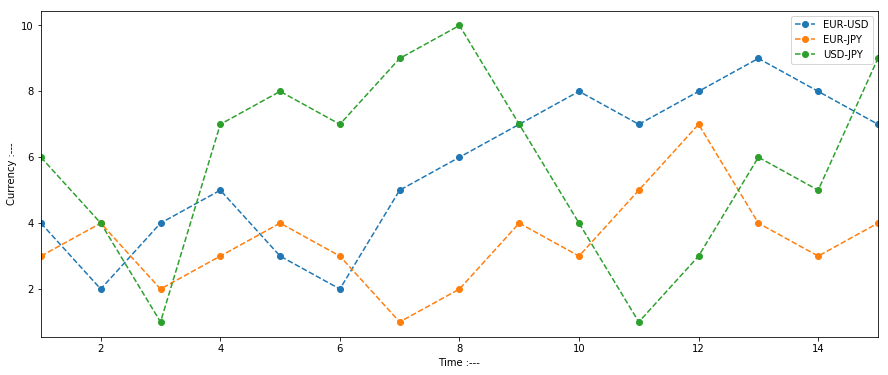

In [4]:
#Plotting data

axis = df.plot(figsize=(15, 6), marker='o', linestyle='--')

#Setting X-Label 
axis.set_xlabel("Time :---") 

#Setting Y-Label 
axis.set_ylabel("Currency :---")  

plt.show()

### Plotting EUR-USD Trend Line :

In [5]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['EUR-USD'].index)),df['EUR-USD'],1,full=True)
mse = residuals[0]/(len(df['EUR-USD'].index))
nrmse = np.sqrt(mse)/(df['EUR-USD'].max() - df['EUR-USD'].min())
print('Slope: ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

max_name = df['EUR-USD'].name
max_slope = coefficients[0]

if coefficients[0]>0:
    print "\nEUR-USD has an Uptrend\n"
else:
    print "\nEUR-USD has a Downtrend"


Slope: 0.428571428571
NRMSE: 0.172633708033

EUR-USD has an Uptrend



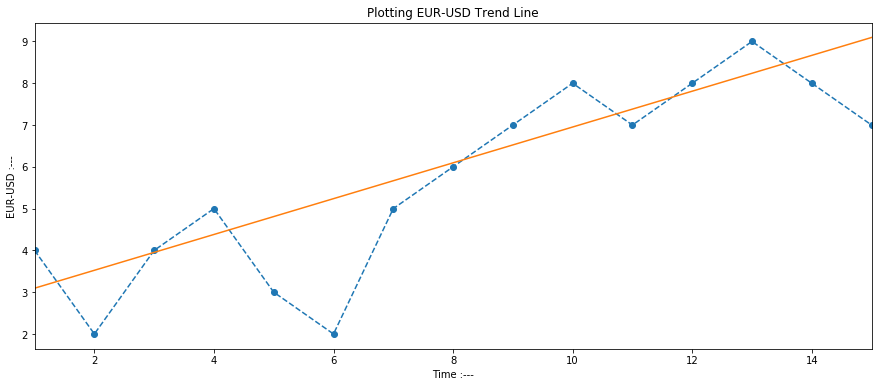

In [6]:
axis = df['EUR-USD'].plot(figsize=(15, 6), marker='o', linestyle='--', title="Plotting EUR-USD Trend Line")
axis.set_xlabel("Time :---") 
axis.set_ylabel("EUR-USD :---")  

plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['EUR-USD'])+1)])
plt.show()

### Plotting EUR-JPY Trend Line :

In [7]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['EUR-JPY'].index)),df['EUR-JPY'],1,full=True)
mse = residuals[0]/(len(df['EUR-JPY'].index))
nrmse = np.sqrt(mse)/(df['EUR-JPY'].max() - df['EUR-JPY'].min())
print('Slope: ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

if coefficients[0]>max_slope:
    max_name = df['EUR-JPY'].name
    max_slope = coefficients[0]

if coefficients[0]>0:
    print "\nEUR-JPY has an Uptrend\n"
else:
    print "\nEUR-JPY has a Downtrend\n"

Slope: 0.117857142857
NRMSE: 0.210132443328

EUR-JPY has an Uptrend



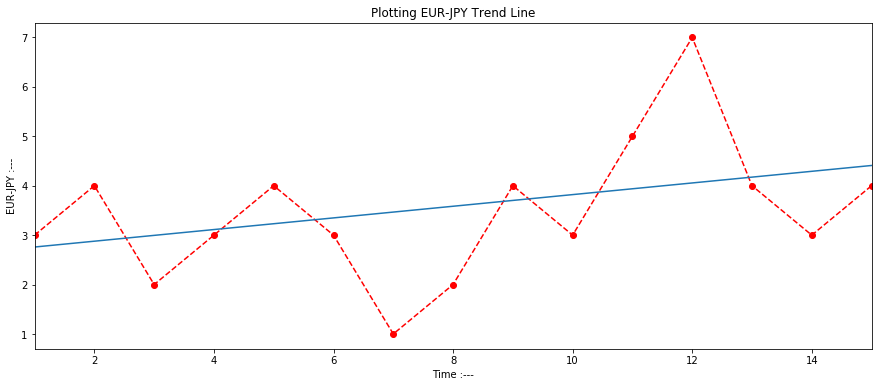

In [8]:
axis = df['EUR-JPY'].plot(figsize=(15, 6), marker='o', linestyle='--', color='r', title="Plotting EUR-JPY Trend Line")
axis.set_xlabel("Time :---")  
axis.set_ylabel("EUR-JPY :---") 

plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['EUR-JPY'])+1)])
plt.show()

### Plotting USD-JPY Trend Line :

In [9]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['USD-JPY'].index)),df['USD-JPY'],1,full=True)
mse = residuals[0]/(len(df['USD-JPY'].index))
nrmse = np.sqrt(mse)/(df['USD-JPY'].max() - df['USD-JPY'].min())
print('Slope: ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

if coefficients[0]>max_slope:
    max_name = df['USD-JPY'].name
    max_slope = coefficients[0]

if coefficients[0]>0:
    print "\nUSD-JPY has an Uptrend"
else:
    print "\nUSD-JPY has a Downtrend"

Slope: 0.025
NRMSE: 0.298452800413

USD-JPY has an Uptrend


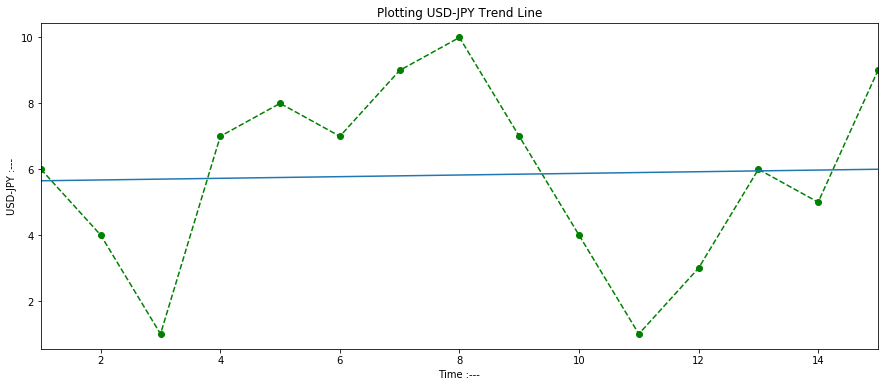

In [10]:
axis = df['USD-JPY'].plot(figsize=(15, 6), marker='o', linestyle='--', color='g', title="Plotting USD-JPY Trend Line")
 
axis.set_xlabel("Time :---") 
axis.set_ylabel("USD-JPY :---")  

plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['USD-JPY'])+1)])
plt.show()

### Plotting All Currency Trend Line :

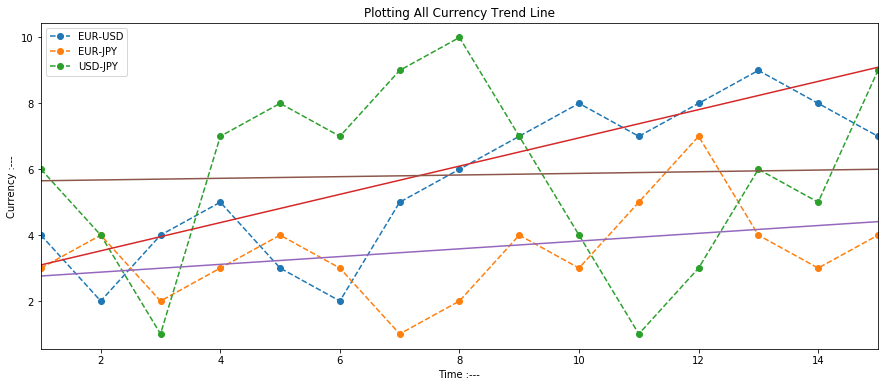

In [11]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df.index)),df,1,full=True)

axis = df.plot(figsize=(15, 6), marker='o', linestyle='--', title="Plotting All Currency Trend Line")
axis.set_xlabel("Time :---") 
axis.set_ylabel("Currency :---")  

plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df)+1)])
plt.show()

In [12]:
print ("\n"+max_name+" has the maximum slope of : "+str(max_slope))


EUR-USD has the maximum slope of : 0.428571428571


## Ouput :

**EUR-USD Trend : EUR-USD has an Uptrend**
- Slope: 0.428571428571
- NRMSE: 0.172633708033

**EUR-JPY Trend : EUR-JPY has an Uptrend**
- Slope: 0.117857142857
- NRMSE: 0.210132443328

**USD-JPY Trend : USD-JPY has an Uptrend**
- Slope: 0.025
- NRMSE: 0.298452800413

-----------------------------------------------------------------------------------------------------


**Since 'EUR-USD' has highest positive Slope (0.4286) and lowest Normalized Mean Squared Error (0.1726)**
 - **'EUR' or Euro is the best performing currency.**


**Since 'USD-JPY' has lowest positive Slope (0.025) and highest Normalized Mean Squared Error (0.2984)**
 - **'JPY' or  Japanese Yen is the worst performing currency.** 


** The above overall Trends can be divided into small trends based on different time span like months and seasons, we can then visualize trends based on different seasons ad different time spans.**